# On Gaussian Random Fields
![A random field](rf.png)

$$\renewcommand\vec[1]{\boldsymbol{#1}}$$

This talk is on Gaussian Random Fields. Here we consider the statistics of an entire field of values, like one shown here in the first slide. I will show both howto draw one instance of such a field from a distribution and how to get statistics from such a field, when you're given one.

# White Noise

![white noise](white-noise.png)

Here we see an instance of *white noise*. This is a field of values that are completely uncorrelated (which is for the purpose of this talk synonymous to independent). For each location $\vec{x}$ in the domain, the value $y = f(\vec{x})$ is an independent Gaussian variate.

# Uncorrelated
![dice](dice_1.jpg)

### Univariate Normal Distribution

$$P(y_1) = \frac{1}{\sqrt{2\pi} \sigma_1} \exp\left(-\frac{{(y_1 - \mu_1)}^2}{2 \sigma_1^2}\right).$$

The statistics of such white noises is completely described by the *one-point distribution function*, here written as $P(y_1)$. Note that we assume the field is homogeneous, meaning that the distribution function $P(y_1)$ is constant for all $\vec{x}$.

# Correlated?
![all sixes](all-six.jpg)

Now we consider correlated random fields, like the one shown in the first slide. The probability function for the value of each point now depends on the drawn value for each other point. Let's say we know the value $f(\vec{x})$ at a single point $\vec{x_1}$. We now also have information on the mean and variance of the value at a second point $\vec{x_2}$. The joint probability function of all the points in the domain (or a finite selection thereof) is given in the next slide.

### Multivariate normal statistics

* Generalisation of Univariate Normal distribution (for zero mean)

$$P(\vec{y}) = \frac{1}{\sqrt{{(2\pi)}^N \det M}}\exp\left(-\frac{1}{2} \vec{y}^{\dagger}M^{-1}\vec{y}\right)$$

$$M_2 = \begin{pmatrix}
    \sigma^2 & \xi \\
    \xi & \sigma^2
\end{pmatrix}$$

$$\xi(\vec{x}, \vec{x} + \vec{r}) := \langle f(\vec{x})^{\star} f(\vec{x} + \vec{r}) \rangle$$

The defining property of a Gaussian Random Field, is that the joint probability for its values is given by a multivariate normal distribution. The multivariate normal distribution is again defined by its property that each linear combination of values should have a univariate normal distribution. It can then be shown that it is enough to know the joint probability function between any two points in the random field to know the statistics of the entire field. If there were any non-trivial dependence on a third point, the field can no longer be considered to arise from a Gaussian process, as in the sense of, for example, the central limit theorem. 

Here the two-point correlation function $\xi(\vec{x_1}, \vec{x_2}) = \xi(\vec{x}, \vec{x} + \vec{r})$ is the ensemble correlation for the points $\vec{x_1}$ and $\vec{x_2}$. In the application that we consider, cosmology, we assume homogeneity, which alows us to exchange ensemble average for volume average. This is refered to as the *ergodic theorem*.

In the next slide I show a case where a point cloud has a bi-normal distribution, the single-point distributions plotted as bar charts projected on their orthogonal axes. For this example I first generated white noise for two independent variables $(p, q)$, then correlating the two variables by introducing a linear transform
$$\begin{pmatrix}x \\ y\end{pmatrix} = A \begin{pmatrix}p \\ q\end{pmatrix},\quad A = \begin{pmatrix}1 & 0 \\ 1 & 1\end{pmatrix}.$$

**Exercise**: In the general case of $$A = \begin{pmatrix}a & b \\ c & d\end{pmatrix},$$ what is the value of $\xi$, and what of the correlation matrix?.

![multivariate distribution](mvnd.png)

# Brown noise: Correlated.
![GRF with correlation](correlated.png)

Here we see an example, where the random field is correlated.

# Cosmology
![Cosmic Microwave Background Radiation](cmb-planck.jpg)

The cosmic microwave background radiation (CMB); this is cosmic noise. In the earliest dawn of the Universe, less then $10^{-32}$ seconds after the Big Bang, this noise arose from pair creation during a phase of rapid expansion called *cosmic inflation*. This is quantum noise, $\Delta E \Delta t \ge \hbar/2$, blown to intergalactic proportions, now observed as minute temperature fluctuations by the Planck sattelite. Since this noise has a quantum origin, it can be described by a Gaussian random process. To analyse the characteristics of this noise, we need to study it in Fourier space.

# Fourier space

![Pink Floyd](pink-floyd.jpg)

### The Fourier Transform (in 3D)

$$\mathcal{F}[f] = \hat{f}(\vec{k}) = \int f(\vec{x}) e^{-i\vec{k}\cdot\vec{x}} {\rm d}^3\vec{x}$$
$$\mathcal{F}^{-1} \lbrack\hat{f}\rbrack = f(\vec{x}) = \int \hat{f}(\vec{k}) e^{i\vec{k}\cdot\vec{x}} \frac{{\rm d}^3\vec{k}}{{(2\pi)}^3}.$$

Here I give the definition of the 3D Fourier transform in the convention that I'm used to. Using this definition, it is possible to show the following relation between $\mathcal{P}(\vec{k})$, the *power-spectrum*, and the two-point correlation function that we saw earlier. The nice thing about the power-spectrum is that it is much easier to measure, due to the Fourier convolution theorem.

### Define the Power spectrum.

$$\left< {\hat{f}(\vec{k})}^{\star}\hat{f}(\vec{k'}) \right> := {(2\pi)}^3 \mathcal{P}(\vec{k})\delta(\vec{k} - \vec{k'})$$
$$\xi(\vec{r}) = \int \mathcal{P}(\vec{k}) e^{i\vec{k}\cdot\vec{r}} \frac{{\rm d}^3\vec{k}}{{(2\pi)}^3}$$

# Getting the information out
![Power spectrum](Planck_power_spectrum_orig.jpg)

This is the power-spectrum of the CMB. This plot shows all the physical information contained in the previous figure of the cosmic microwave background radiation. Since all statistics of a Gaussian Random Field is ruled by the two-point function, and the power-spectrum is its Fourier transform. This has the small complication that the CMB projects on a sphere, so it reduces into spherical harmonics, but the theory is the same. The red points are the observed values, the green line gives the fit from a (the) theoretical model of only *six* parameters. The green shade is the effect of *cosmic variance*. This is the uncertainty in the expected value due to the fact that we have only one universe.

Note that the power-spectrum only gives information on the physical characteristics of the CMB, not the actual geometry of the fluctuations. That information is stored in the Fourier phases. While the geometry of the fluctuations becomes very interesting if you study the onset of structure formation from these fluctuations, the power-spectrum contains all information on the physics.

# Let's see some code

In [2]:
# Solely uses NumPy
import numpy as np
from numpy import (fft, random)

In [28]:
# and some utility code
# import gnuplot as gp
import matplotlib
import matplotlib.pyplot as plt
import cft

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

cols = []
for x in np.linspace(0,1, 256):
    rcol = 0.237 - 2.13*x + 26.92*x**2 - 65.5*x**3 + 63.5*x**4 - 22.36*x**5
    gcol = ((0.572 + 1.524*x - 1.811*x**2)/(1 - 0.291*x + 0.1574*x**2))**2
    bcol = 1/(1.579 - 4.03*x + 12.92*x**2 - 31.4*x**3 + 48.6*x**4 - 23.36*x**5)
    cols.append((rcol, gcol, bcol))

cm_plusmin = matplotlib.colors.LinearSegmentedColormap.from_list("PaulT_plusmin", cols)

In [4]:
# Setup the parameters
random.seed(42)
N = 256
L = 1.0
box = cft.Box(2, N, L)

The `Box` class stores some information on the physical box, most importantly the Fourier modes associated with a straight forward application of `fft.fftn` to a square array of size `N`.

In [5]:
cft.Box(2, 4, 4.0).K

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.57079633,  1.57079633,  1.57079633,  1.57079633],
        [ 3.14159265,  3.14159265,  3.14159265,  3.14159265],
        [-1.57079633, -1.57079633, -1.57079633, -1.57079633]],

       [[ 0.        ,  1.57079633,  3.14159265, -1.57079633],
        [ 0.        ,  1.57079633,  3.14159265, -1.57079633],
        [ 0.        ,  1.57079633,  3.14159265, -1.57079633],
        [ 0.        ,  1.57079633,  3.14159265, -1.57079633]]])

In [6]:
cft.Box(2, 4, 1.0).K

array([[[  0.        ,   0.        ,   0.        ,   0.        ],
        [  6.28318531,   6.28318531,   6.28318531,   6.28318531],
        [ 12.56637061,  12.56637061,  12.56637061,  12.56637061],
        [ -6.28318531,  -6.28318531,  -6.28318531,  -6.28318531]],

       [[  0.        ,   6.28318531,  12.56637061,  -6.28318531],
        [  0.        ,   6.28318531,  12.56637061,  -6.28318531],
        [  0.        ,   6.28318531,  12.56637061,  -6.28318531],
        [  0.        ,   6.28318531,  12.56637061,  -6.28318531]]])

### white noise

In [7]:
f = random.normal(0, 1, box.shape)

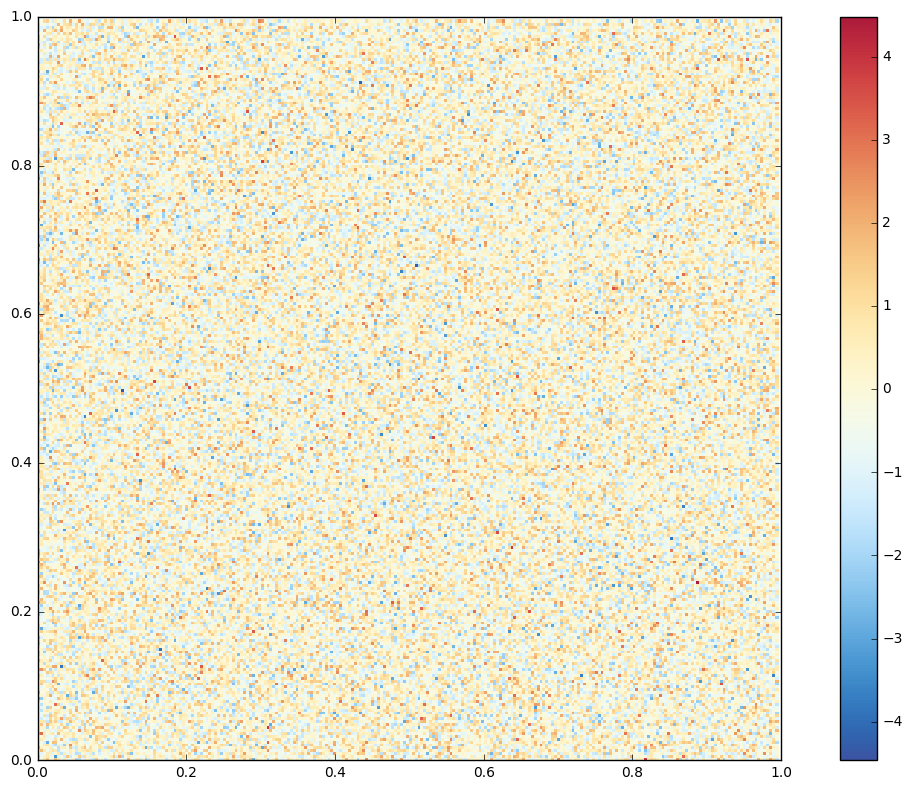

In [36]:
def show_field(f):
    x = np.arange(N) * box.res
    fig = plt.figure()
    ax = fig.add_subplot('111')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect(1.0)
    cm = ax.pcolormesh(x, x, f, cmap=cm_plusmin)
    fig.colorbar(cm, ax=ax)
    fig.tight_layout()
    plt.show()
    
show_field(f)

### Now with a power-spectrum $P(k) = k^{n}$.
Now we will apply a power-spectrum to this field. Try to play with the values!

In [34]:
F = fft.fft2(f)
P = cft.Power_law(-2.0) # * cft.Scale(box, 0.01)
F *= np.sqrt(P(box.K))
f_q = fft.ifft2(F)
print("Check against leakage! σ[Im] = {:6e}, σ[Re] = {:6e}".format(f_q.imag.std(), f_q.real.std()))

Check against leakage! σ[Im] = 3.723899e-18, σ[Re] = 3.704283e-03


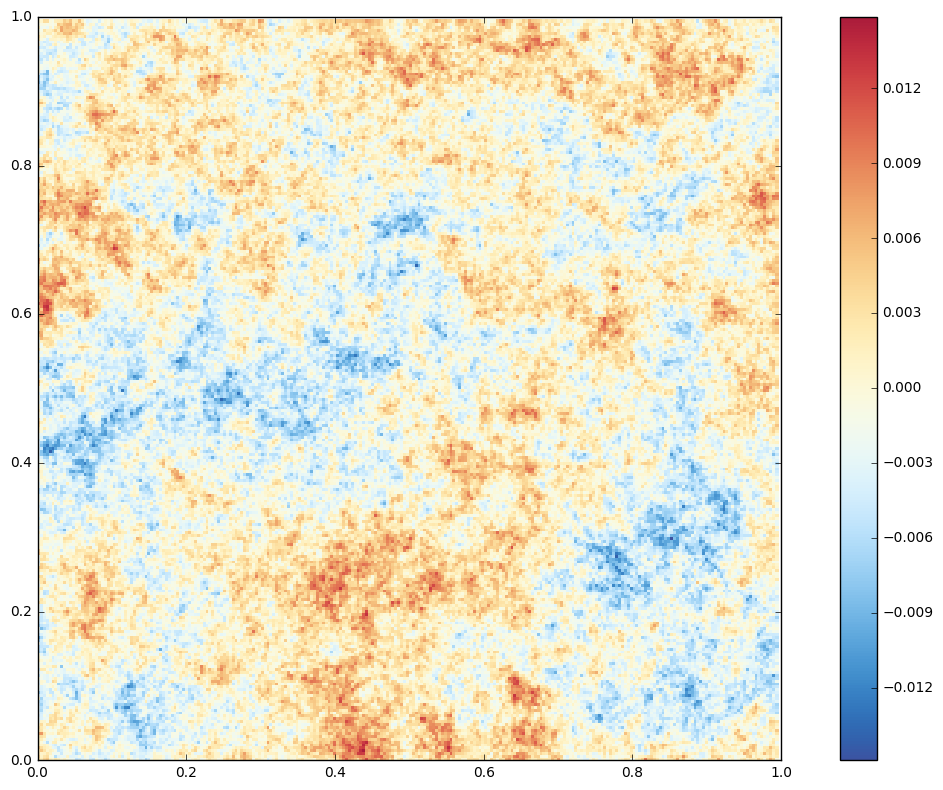

In [37]:
show_field(f_q.real)

### Retrieve Power Spectrum

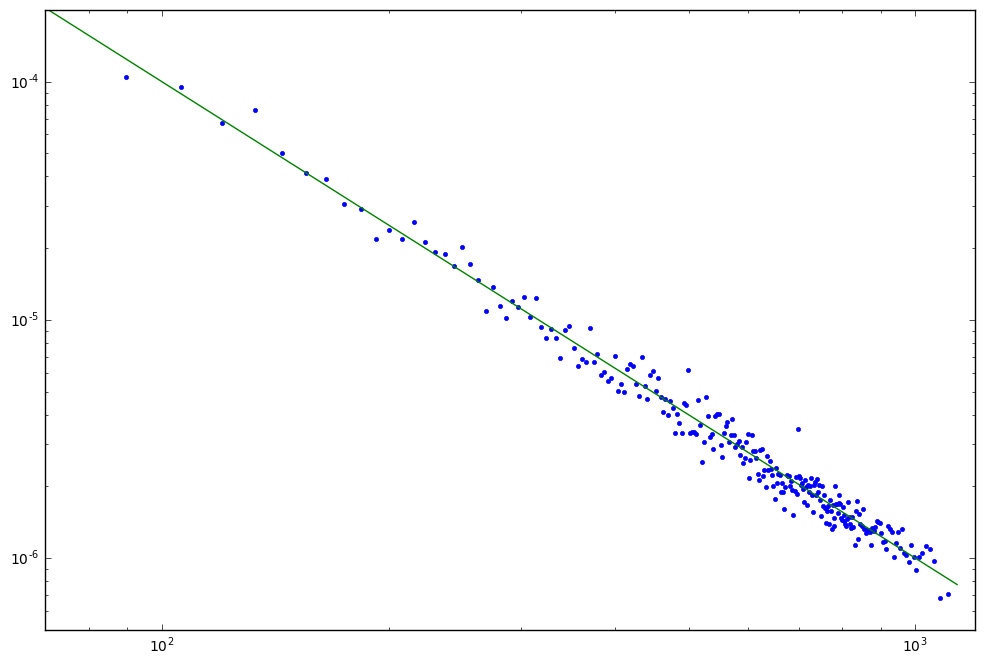

In [50]:
def power_spectrum(F, k):
    # compute power
    P_F = (F * F.conj()).real / N**2
    
    # sort on |k|
    idx = np.argsort(box.k.flat)
    
    # bin data
    p = P_F.flat[idx].reshape([256, -1]).std(axis=1)
    k = box.k.flat[idx].reshape([256, -1]).mean(axis=1)
    return np.c_[k, p]


power = power_spectrum(F, box.k)

k = np.logspace(np.log10(box.k_min), np.log10(box.k_max)+0.15, 10)
p = k**-2
fig = plt.figure()
ax = fig.add_subplot('111')
ax.plot(power[:,0], power[:,1], '.')
ax.plot(k, p, '-')
ax.set_ylim(5e-7, 2e-4)
ax.set_yscale('log')
ax.set_xlim(70, 1200)
ax.set_xscale('log')
plt.show()

# Questions?